In [60]:
#  Chargement des packages Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
# PARAMETRES
PrjLocation = '/home/ubuntu/XRAY/'              # Chemin Projet
ArchiveFolder = 'COVID-19_Radiography_Dataset/' # Dossier Archive
SampleAnalyzedPerClass = 1345

In [62]:
# Récupération des metadata
df_Normal = pd.read_excel(PrjLocation + ArchiveFolder + 'Normal.metadata.xlsx')
df_COVID = pd.read_excel(PrjLocation + ArchiveFolder + 'COVID.metadata.xlsx')
df_LungOpacity = pd.read_excel(PrjLocation + ArchiveFolder + 'Lung_Opacity.metadata.xlsx')
df_ViralPneumonia = pd.read_excel(PrjLocation + ArchiveFolder + 'Viral Pneumonia.metadata.xlsx')


In [63]:
# Ajout feature Class
df_Normal['Class'] = 'Normal'
df_COVID['Class'] = 'COVID'
df_LungOpacity['Class'] = 'Lung Opacity'
df_ViralPneumonia['Class'] = 'Viral Pneumonia'

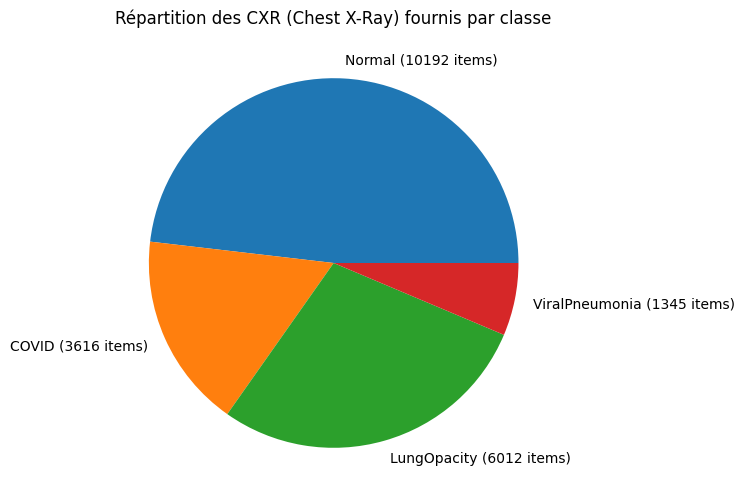

In [64]:
# Répartition des cas par classe
plt.figure(figsize=(12,6))
str(df_Normal.shape[0])
plt.pie([df_Normal.shape[0],df_COVID.shape[0],df_LungOpacity.shape[0],df_ViralPneumonia.shape[0]],
        labels=['Normal (' + str(df_Normal.shape[0]) + ' items)' ,'COVID (' + str(df_COVID.shape[0]) + ' items)','LungOpacity (' + str(df_LungOpacity.shape[0]) + ' items)','ViralPneumonia (' + str(df_ViralPneumonia.shape[0]) + ' items)'])
plt.title('Répartition des CXR (Chest X-Ray) fournis par classe')
plt.show()

In [65]:
'Normal\n (' + str(df_Normal.shape[0]) + ' items)' 

'Normal\n (10192 items)'

In [66]:
# Ajout des images Normal
df_Normal['FILE NAME'] = df_Normal['FILE NAME'].str.replace('NORMAL','Normal') # Trick pour obtenir la bonne casse des noms de fichiers
NormalFolder = PrjLocation + ArchiveFolder + 'Normal/'
IMG_NORMAL = []
for file in df_Normal.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    img = cv2.imread(NormalFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_NORMAL.append(img)


In [67]:
# Ajout des masques Normal
df_Normal['FILE NAME'] = df_Normal['FILE NAME'].str.replace('NORMAL','Normal') # Trick pour obtenir la bonne casse des noms de fichiers
NormalFolder = PrjLocation + ArchiveFolder + 'Normal/'
MSK_NORMAL = []
for file in df_Normal.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    msk = cv2.imread(NormalFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_NORMAL.append(msk)

In [68]:
# Ajout des images COVID
COVIDFolder = PrjLocation + ArchiveFolder + 'COVID/'
IMG_COVID = []
for file in df_COVID.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    img = cv2.imread(COVIDFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_COVID.append(img)

In [69]:
# Ajout des masques COVID
COVIDFolder = PrjLocation + ArchiveFolder + 'COVID/'
MSK_COVID = []
for file in df_COVID.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    msk = cv2.imread(COVIDFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_COVID.append(msk)

In [70]:
# Ajout des images LungOpacity
LOFolder = PrjLocation + ArchiveFolder + 'Lung_Opacity/'
IMG_LO = []
for file in df_LungOpacity.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    img = cv2.imread(LOFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_LO.append(img)

In [71]:
# Ajout des masques LungOpacity
LOFolder = PrjLocation + ArchiveFolder + 'Lung_Opacity/'
MSK_LO = []
for file in df_LungOpacity.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    msk = cv2.imread(LOFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_LO.append(msk)

In [72]:
# Ajout des images Viral Pneumonia
VPFolder = PrjLocation + ArchiveFolder + 'Viral Pneumonia/'
IMG_VP = []
for file in df_ViralPneumonia.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    img = cv2.imread(VPFolder + 'images/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    IMG_VP.append(img)

In [73]:
# Ajout des masques Viral Pneumonia
VPFolder = PrjLocation + ArchiveFolder + 'Viral Pneumonia/'
MSK_VP = []
for file in df_ViralPneumonia.loc[:SampleAnalyzedPerClass,'FILE NAME']:
    msk = cv2.imread(VPFolder + 'masks/' + file + '.png',cv2.IMREAD_GRAYSCALE)
    MSK_VP.append(msk)

In [74]:
# Troncature SampleAnalyzedPerClass
df_Normal = df_Normal.iloc[:SampleAnalyzedPerClass,:]
df_COVID = df_COVID.iloc[:SampleAnalyzedPerClass,:]
df_LungOpacity = df_LungOpacity.iloc[:SampleAnalyzedPerClass,:]
df_ViralPneumonia = df_ViralPneumonia.iloc[:SampleAnalyzedPerClass,:]


In [75]:
# Ajout feature Image
df_Normal['Image'] = IMG_NORMAL[:SampleAnalyzedPerClass]
df_COVID['Image'] = IMG_COVID[:SampleAnalyzedPerClass]
df_LungOpacity['Image'] = IMG_LO[:SampleAnalyzedPerClass]
df_ViralPneumonia['Image'] = IMG_VP[:SampleAnalyzedPerClass]

# Ajout feature Mask
df_Normal['Mask'] = MSK_NORMAL[:SampleAnalyzedPerClass]
df_COVID['Mask'] = MSK_COVID[:SampleAnalyzedPerClass]
df_LungOpacity['Mask'] = MSK_LO[:SampleAnalyzedPerClass]
df_ViralPneumonia['Mask'] = MSK_VP[:SampleAnalyzedPerClass]

In [76]:
# Construction d'un Dataframe global
df = pd.concat([df_Normal,df_COVID,df_LungOpacity,df_ViralPneumonia])

df.reset_index(drop=True,inplace=True)

In [77]:
# Fonction permettant d'obtenir des statistiques sur l'image analysées
#   - PixelCount = Nombre de pixel de l'image filtrée (surface)
#   - Brightness = Valeur moyenne de l'intensité des pixels de l'image filtrée
#   - BrightnessAmbient = Valeur moyenne de l'intensité des pixels de l'image en dehors du mask (intensité de l'ambiance)
def Get_CXRStats(img,msk):
    msk = cv2.resize(msk,(299,299))
    img2 = cv2.bitwise_and(img,msk)
    PixelCount = msk[msk==255].size
    Brightness = img[msk==255].mean()
    BrightnessAmbient = img[msk==0].mean()
    return PixelCount, Brightness, BrightnessAmbient

In [78]:
PixCnt = []
Bright = []
BrightAmb = []
for CXRi in df.index:
    a,b,c = Get_CXRStats(df.iloc[CXRi,5],df.iloc[CXRi,6])
    PixCnt.append(a)
    Bright.append(b)
    BrightAmb.append(c)

df['PixelCount'] = PixCnt
df['Brightness'] = Bright
df['BrightnessAmbient'] = BrightAmb

In [79]:
# Génération d'un numéro d'échantillon RandomIndex au hasard
rng = np.random.default_rng()
RandomIndex = rng.integers(low=0, high=df.shape[0], size=1)[0]


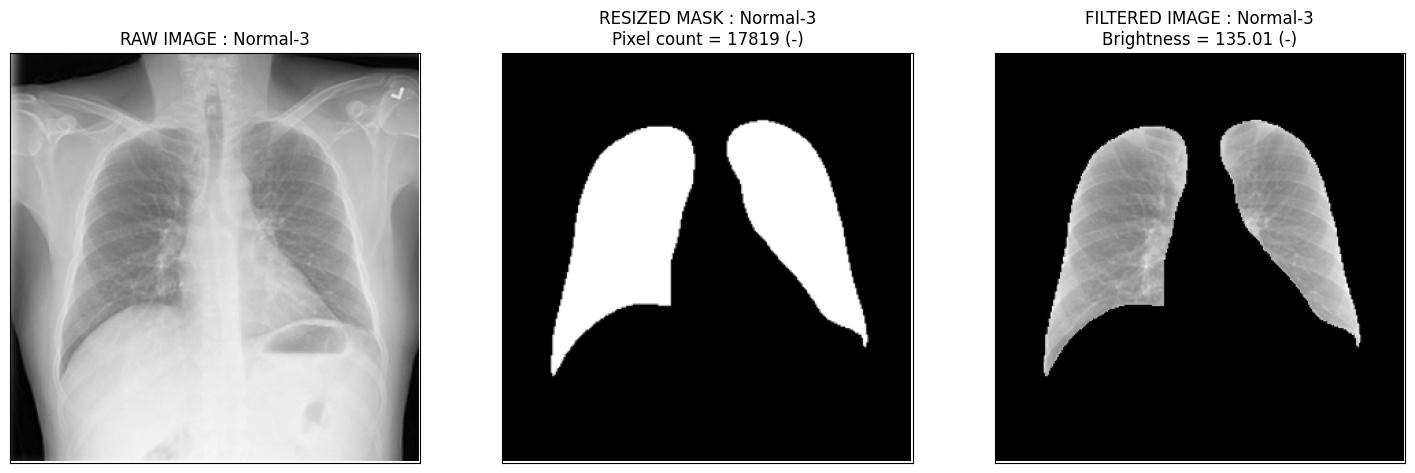

In [80]:
# CXR Viewer

# Sélection de l'échantillon à visualiser
Index = RandomIndex


fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,8))

img = df.iloc[Index,5]
msk = cv2.resize(df.iloc[Index,6],(299,299))

ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(msk, cmap = 'gray')
ax[2].imshow(cv2.bitwise_and(img,msk), cmap = 'gray') # pour masquer mon_image, cmap = 'gray')

ax[0].set_title('RAW IMAGE : ' + df.iloc[Index,0])
ax[1].set_title('RESIZED MASK : ' + df.iloc[Index,0] + '\nPixel count = ' + str(df.iloc[Index,7]) + ' (-)')
ax[2].set_title('FILTERED IMAGE : ' + df.iloc[Index,0] + '\nBrightness = ' + f"{df.iloc[Index,8]:5.2f}" + ' (-)')

for axe in ax:
    axe.set_xlim([0,300])
    axe.set_ylim([300,0])
    axe.set_xticks([])
    axe.set_yticks([])



Text(0.5, 1.0, 'Dataset URL vs Class')

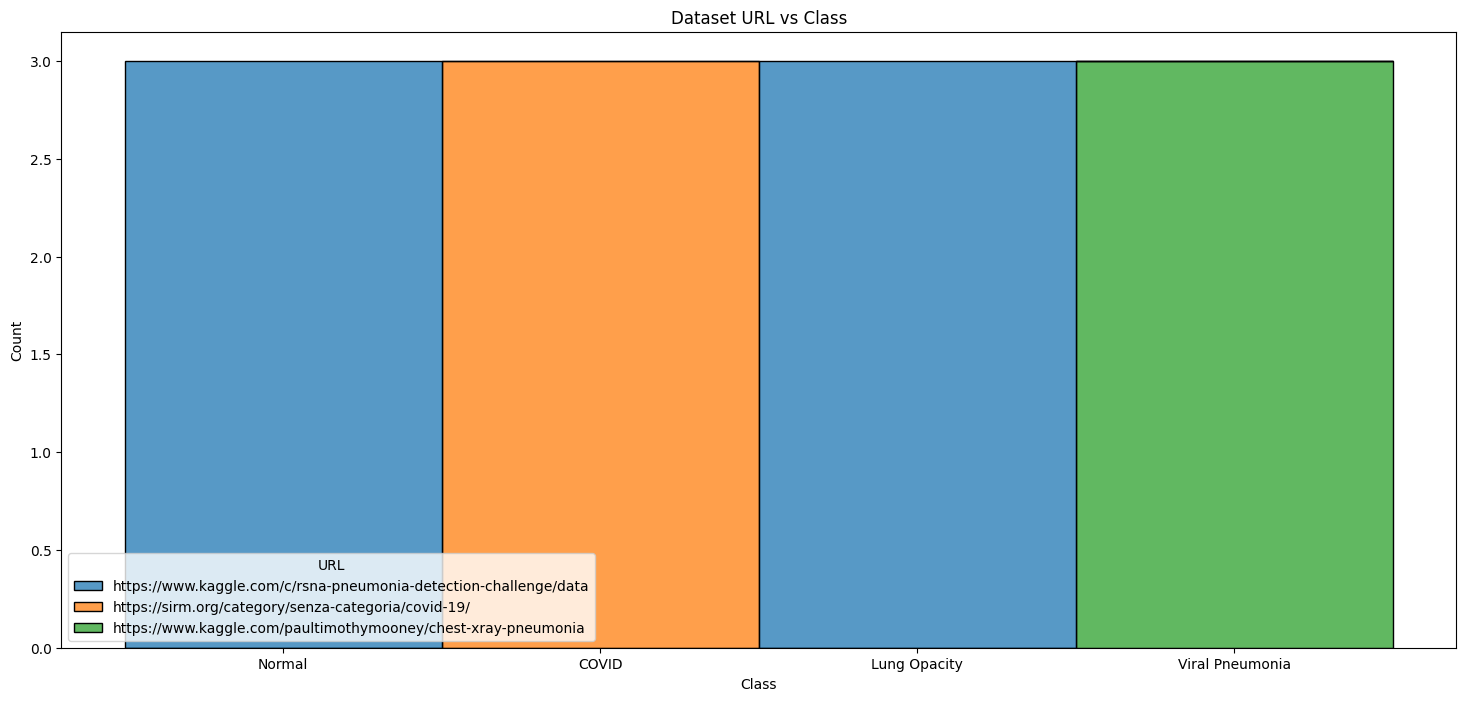

In [81]:
plt.figure(figsize=(18,8))
sns.histplot(df,x='Class',hue='URL', multiple="stack")
# plt.legend(loc='best')
plt.title('Dataset URL vs Class')

<Figure size 1800x800 with 0 Axes>

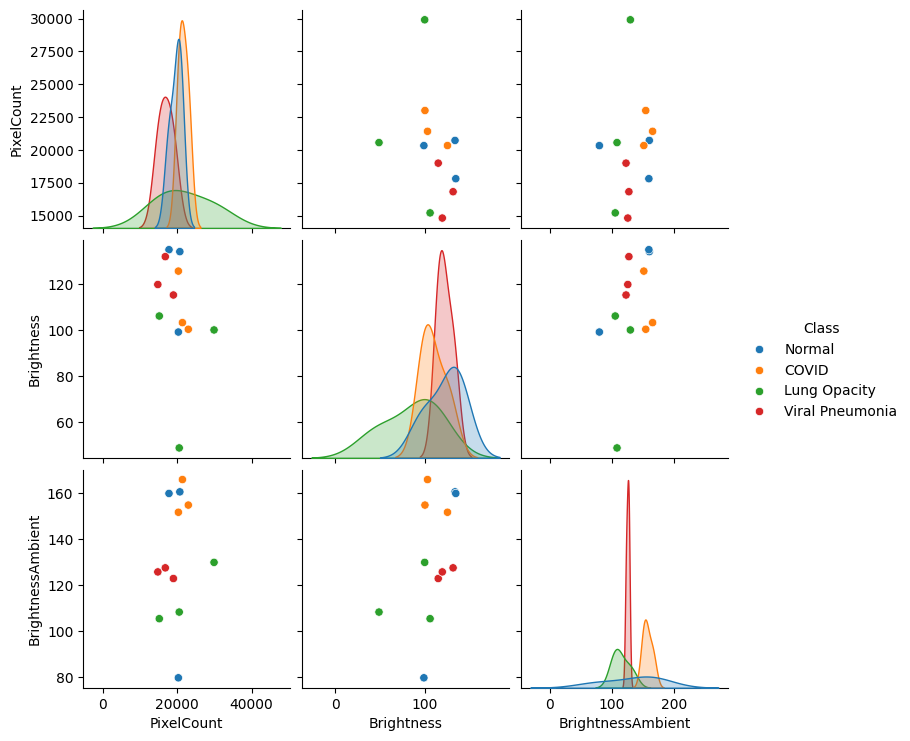

In [82]:
fig=plt.figure(figsize=(18,8))
sns.pairplot(data=df,vars=['PixelCount', 'Brightness', 'BrightnessAmbient'],hue='Class')

In [83]:
df.head(12)



,FILE NAME,FORMAT,SIZE,URL,Class,Image,Mask,PixelCount,Brightness,BrightnessAmbient
0,Normal-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",20335,99.240275,79.856860
1,Normal-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,"[[0, 63, 83, 67, 46, 36, 28, 23, 21, 19, 17, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",20728,134.164608,160.572609
2,Normal-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,"[[170, 141, 114, 93, 76, 62, 49, 36, 27, 18, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",17819,135.014311,159.879998
3,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",20340,125.709292,151.719786
4,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"[[194, 185, 186, 187, 185, 184, 185, 186, 185,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",21422,103.328167,165.909647
5,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"[[99, 230, 255, 255, 255, 255, 255, 255, 255, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",23005,100.437861,154.836568
6,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Lung Opacity,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",20565,48.892195,108.396891
7,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Lung Opacity,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",15217,106.201157,105.519873
8,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Lung Opacity,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",29906,100.144653,129.959302
9,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,Viral Pneumonia,"[[1, 1, 2, 3, 3, 3, 3, 4, 11, 17, 20, 21, 23, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",19002,115.327123,122.955381
